# CASE STUDY: Minimizing Churn Rate Through Analysis of Financial Habits

# Mfonobong Isine

# Probem Statement

# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#loading our dataset
dataset = pd.read_csv('churn_data.csv')

In [5]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [6]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [8]:
#Data cleaning
dataset.isna().any() #returns rows that have NA in them and columns that have atleast one NA in them 

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
dataset.isna().sum() #returns the sum of null values in each columns

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset = dataset[pd.notnull(dataset['age'])] #returns all values that does not have null in them for the age column

In [11]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned']) #drops these two columns because they have too many missing values

# Histograms

In [12]:
dataset2 = dataset.drop(columns =  ['user', 'churn']) #replicate the dataset and drop columns we are not interested in for our histograms

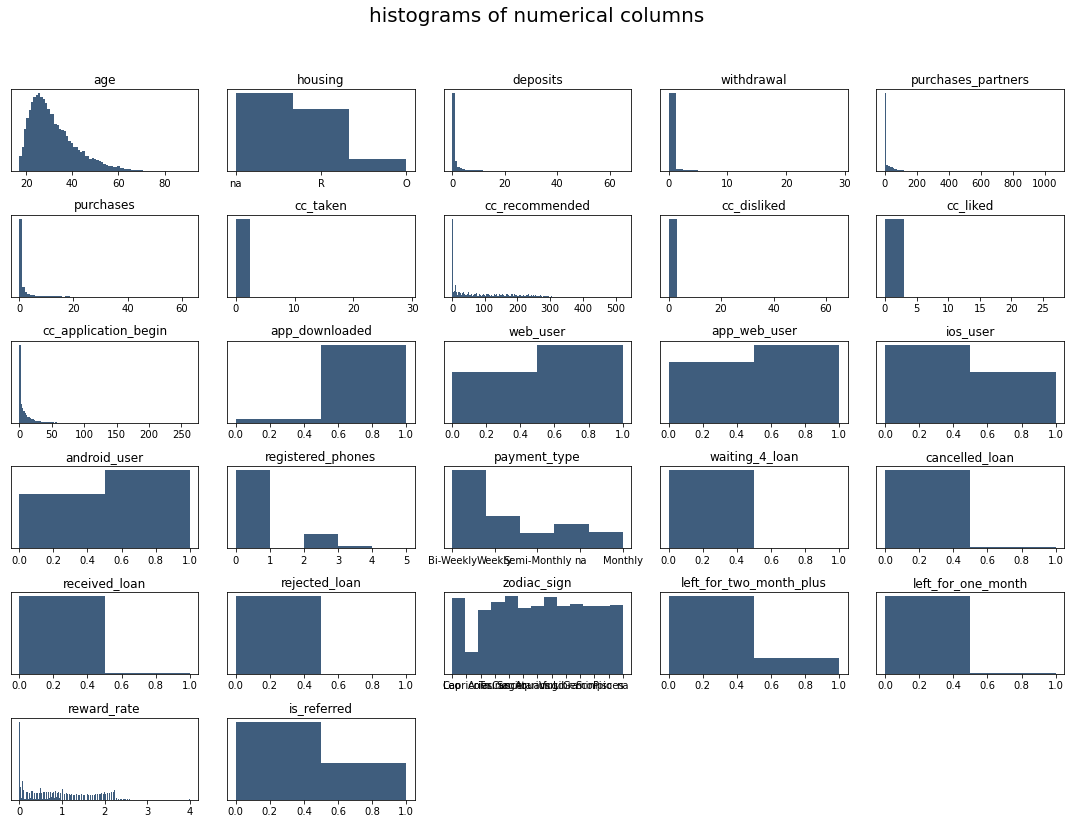

In [13]:
#histograms
fig = plt.figure(figsize = (15, 12))
plt.suptitle('histograms of numerical columns', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) #we set the y values to false because we dont want to be overwelhmed
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #to avoid overlapping

# Pie Charts 

In [14]:
#list of binary columns
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                   'web_user', 'app_web_user', 'ios_user',
                   'android_user', 'registered_phones', 'payment_type',
                   'waiting_4_loan', 'cancelled_loan',
                   'received_loan', 'rejected_loan', 'zodiac_sign',
                   'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if sys.path[0] == '':


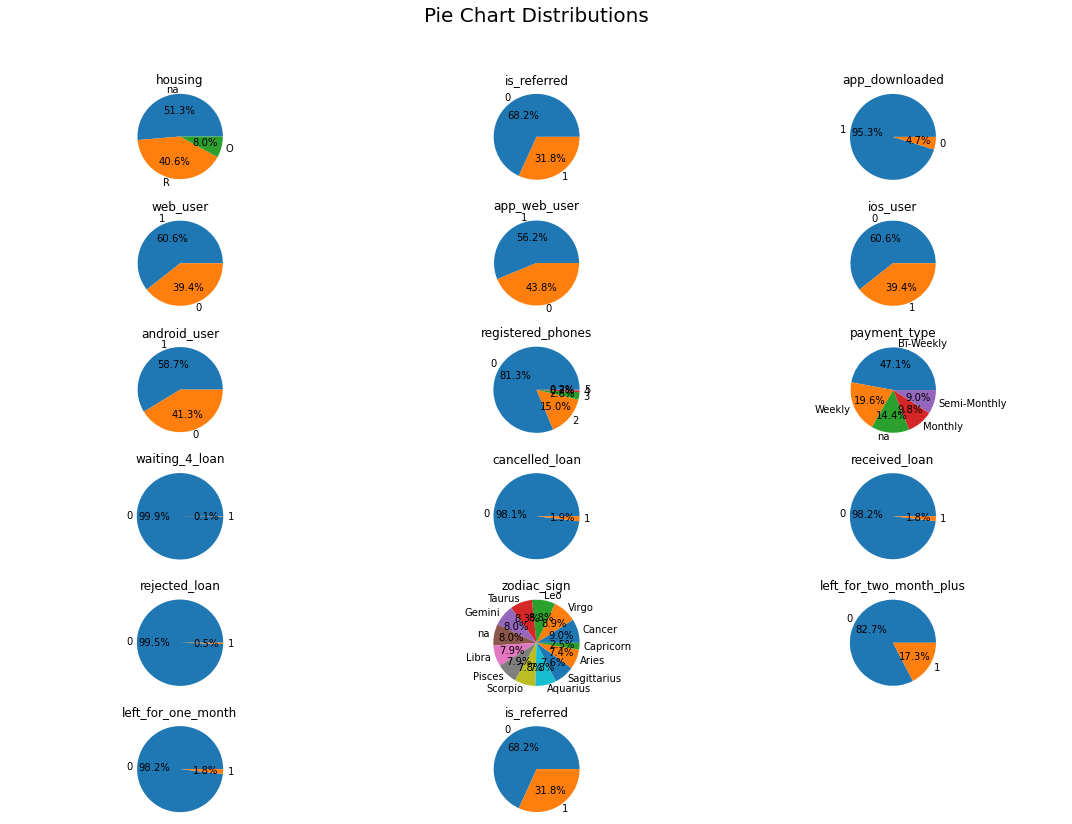

In [15]:
fig = plt.figure(figsize = (15, 12))
plt.suptitle('Pie Chart Distributions', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) #we set the y values to false because we dont want to be overwelhmed
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    
    
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal') #null x and y axis are displayed on the image
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #to avoid overlapping

In [16]:
#exploring uneven features to avoid bias in our model
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
dataset[dataset2.rejected_loan == 1].churn.value_counts() 

1    107
0     25
Name: churn, dtype: int64

In [20]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()
#so from what we have noticed so far, we have a strong reason why this will not be
#a biased field because of how balanced it is

1    266
0    222
Name: churn, dtype: int64

# Correlation Plot

<AxesSubplot:title={'center':'Correlation with the Response Variable'}>

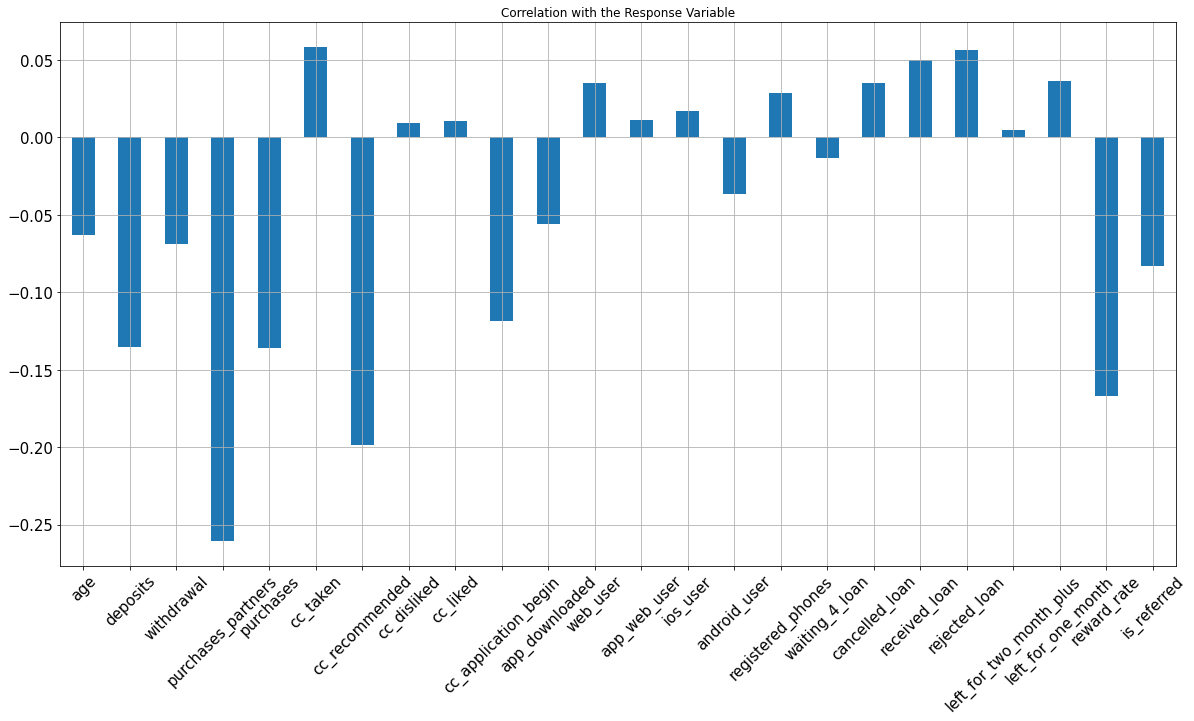

In [21]:
#we drop all non-numerical fields because the correlation plot requires on numerial fields
dataset.drop(columns = ['churn', 'user', 'housing', 'payment_type',
                       'zodiac_sign']).corrwith(dataset.churn).plot.bar(
figsize = (20, 10), title = 'Correlation with the Response Variable', fontsize = 15,
rot = 45, grid = True)

<AxesSubplot:>

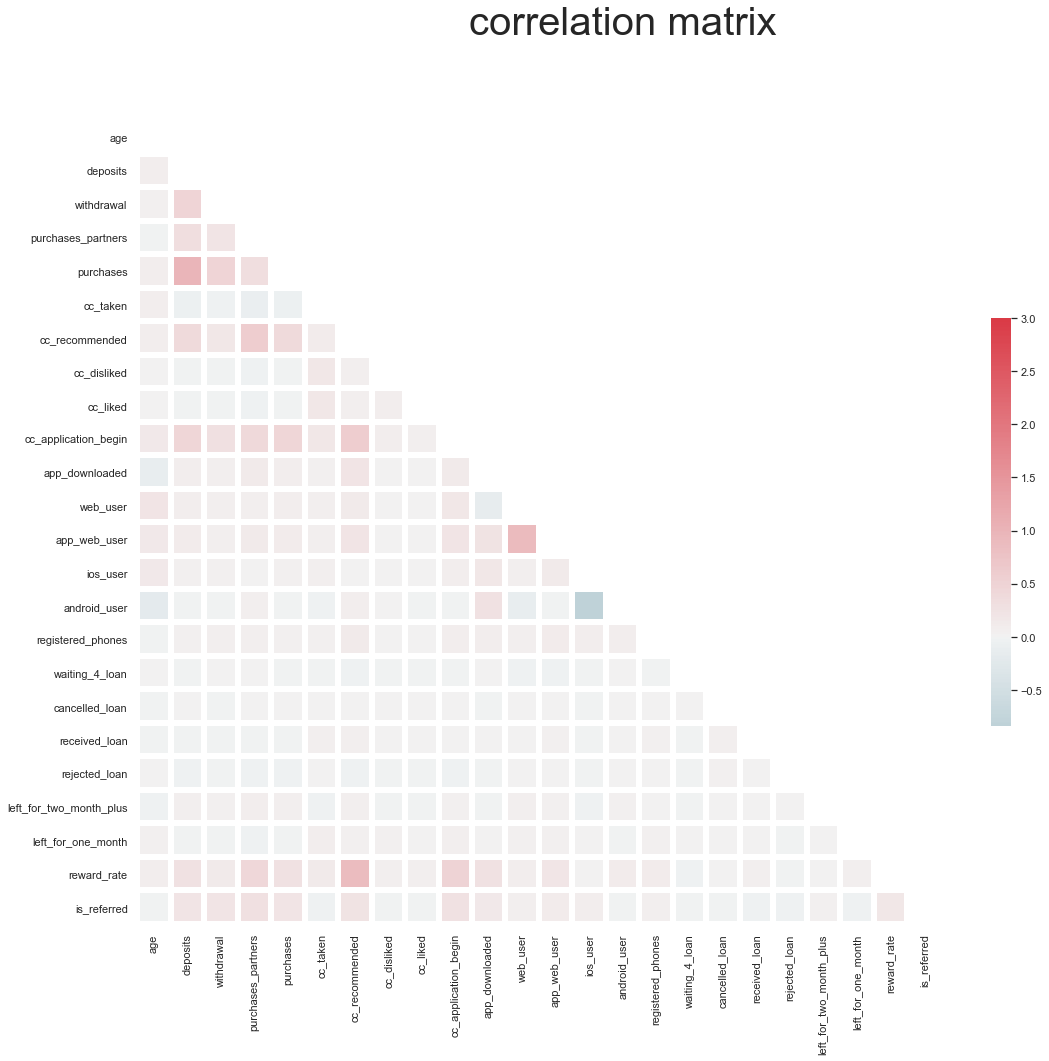

In [22]:
sns.set(style = 'white')

#compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr() 

#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize = (18, 15))
f.suptitle('correlation matrix', fontsize = 40)

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 3, center = 0,
            square = True, linewidths = 5, cbar_kws = {'shrink': .5})


In [23]:
dataset = dataset.drop(columns = ['app_web_user'])# drop this column because of its a dependent column

In [24]:
dataset.to_csv('new_churn_data.csv', index = False) #save data

In [25]:
dataset = pd.read_csv('new_churn_data.csv')

# Data Preparation

In [26]:
user_identifier = dataset['user']

In [27]:
dataset = dataset.drop(columns = ['user'])



In [28]:
#one hot encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [29]:
dataset = pd.get_dummies(dataset) #does one hot encoding for us by detecting categorical variables and assigns them to their own binary columns

In [30]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [31]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na']) #this will remove correlation from one hot encoded columns

In [32]:
#splitting dataset into training and testig
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'], test_size = 0.2, random_state = 0)

In [34]:
#balancing training set
y_train.value_counts()


0    12656
1     8940
Name: churn, dtype: int64

In [35]:
import random
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

random.seed(0)
higher = np.random.choice(higher, size = len(lower )) #making higher as big as the lower by randomly chopping off some og its values
lower = np.asarray(lower) #makes lower the same as higher just for consistency whih makes them botht the same types

new_indexes = np.concatenate((lower, higher))
x_train = x_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

#feature scaling(data normalization)
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

#we create a new dataframe because the scaler returns a numpy aray, so when we do this we loose idex of the rows and column names
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))

x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train = x_train2
x_test = x_test2

In [36]:
x_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.622002,-0.357207,-0.286421,-0.604415,-0.356482,-0.167998,-0.906552,-0.069377,-0.065999,-0.570468,...,-0.307651,-0.160861,-0.296963,-0.311448,-0.297186,-0.290673,-0.286465,-0.298743,-0.297743,-0.316179
19766,-0.422744,-0.357207,-0.286421,-0.654780,-0.356482,-0.167998,0.319744,1.366337,-0.065999,-0.570468,...,-0.307651,-0.160861,-0.296963,-0.311448,3.364898,-0.290673,-0.286465,-0.298743,-0.297743,-0.316179
8354,0.274660,-0.357207,-0.286421,-0.654780,-0.356482,-0.167998,2.000223,-0.069377,-0.065999,-0.244606,...,-0.307651,-0.160861,-0.296963,-0.311448,-0.297186,-0.290673,-0.286465,-0.298743,-0.297743,3.162764
17883,0.573547,-0.357207,-0.286421,0.050328,-0.356482,-0.167998,-0.179859,-0.069377,-0.065999,-0.000210,...,-0.307651,-0.160861,-0.296963,-0.311448,-0.297186,-0.290673,-0.286465,-0.298743,3.358604,-0.316179
25149,-0.821260,-0.246648,-0.286421,-0.100766,-0.243968,-0.167998,-0.577269,-0.069377,-0.065999,-0.244606,...,-0.307651,-0.160861,-0.296963,-0.311448,-0.297186,3.440292,-0.286465,-0.298743,-0.297743,-0.316179


In [37]:
#fitting model to the training set
from sklearn.linear_model import LogisticRegression


In [38]:
classifier = LogisticRegression(random_state = 0)

In [39]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [40]:
#Prediction Test Set
y_pred = classifier.predict(x_test)

In [41]:
#evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 

In [42]:
#accuracy score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6135185185185185

In [43]:
#precision score
precision_score(y_test, y_pred)

0.522947236965345

In [44]:
#recall score
recall_score(y_test, y_pred)

0.7497761862130707

In [45]:
#f1 score
f1_score(y_test, y_pred)

0.6161486113665624

Test Data Accuracy: 0.6135


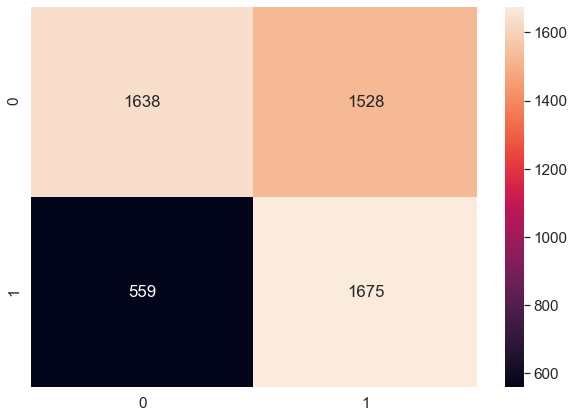

In [46]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [47]:
#applying k-fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [48]:
accuracies

array([0.64317673, 0.65715884, 0.65044743, 0.64261745, 0.63422819,
       0.62472036, 0.63422819, 0.64317673, 0.65100671, 0.65604027])

In [49]:
accuracies.mean()

0.6436800894854586

In [50]:
#analyzing coefficients
pd.concat([pd.DataFrame(x_train.columns, columns = ['features']), pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
         axis = 1)

,features,coef
0,age,-0.170848
1,deposits,0.556975
2,withdrawal,0.053695
3,purchases_partners,-0.691879
4,purchases,-0.706144
5,cc_taken,0.103454
6,cc_recommended,0.058757
7,cc_disliked,0.000200
8,cc_liked,-0.009798
9,cc_application_begin,0.023119


# Feature Selection


In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [52]:
#model to test
classifier = LogisticRegression()


In [53]:
x_train.shape

(17880, 41)

In [54]:
rfe = RFE(classifier, 20) #tells rfe the number of colums we want to reduce it to

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [55]:
rfe = rfe.fit(x_train, y_train)

In [56]:
#summarize the selection of the attributes
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
 False  True  True  True  True  True  True  True  True  True False False
  True False False False  True False False  True False False False False
 False False False False False]


In [57]:
x_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Cancer'],
      dtype='object')

In [58]:
rfe.ranking_ #these are the important columns ranked, 1 are the columns rfe selected

array([ 1,  1,  1,  1,  1,  1,  1, 22, 16, 13, 17,  1, 20,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  5, 12,  1,  6,  8,  7,  1, 15,  3,  1,  4,  9,
       19, 11,  2, 14, 10, 21, 18])

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
#fitting into a new model
#training our model with the columns selected by rfe support
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [61]:
#Prediction Test Set
y_pred = classifier.predict(x_test[x_test.columns[rfe.support_]])

In [62]:
#evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 


In [63]:
#accuracy score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6111111111111112

In [64]:
#precision score
precision_score(y_test, y_pred)

0.520794537554314

In [65]:
#recall score
recall_score(y_test, y_pred)

0.7511190689346464

In [66]:
#f1 score
f1_score(y_test, y_pred)

0.6151026392961877

Test Data Accuracy: 0.6111


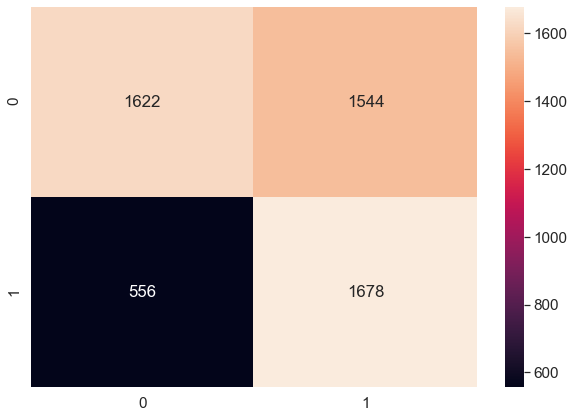

In [67]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print('Test Data Accuracy: %0.4f' % accuracy_score(y_test, y_pred))

In [68]:
#analyzing coefficients
pd.concat([pd.DataFrame(x_train.columns[rfe.support_], columns = ['features']), pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
         axis = 1)

,features,coef
0,age,-0.170984
1,deposits,0.551286
2,withdrawal,0.058496
3,purchases_partners,-0.677619
4,purchases,-0.693557
5,cc_taken,0.105267
6,cc_recommended,0.075428
7,web_user,0.129895
8,android_user,-0.071079
9,registered_phones,0.111468


# Formatting Final Results

In [69]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop = True) #reorder columns for easy viewing

In [70]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,1
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
